<a href="https://colab.research.google.com/github/Th4l3s-pr0g/estudo-IA-CC/blob/main/RegressaoLinearFuelConsumption_tag.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passo 1: Importar os dados com o pandas em um data frame.

In [ ]:
import pandas as pd
dataFrame = pd.read_csv("/content/Fuel_Consumption_2000-2022.csv")

Passo 2: vamos colher informações do data frame.

In [ ]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


Paso 3: vamos avaliar os primeiros registros do data frame.

In [ ]:
dataFrame.tail()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
22551,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
22552,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219
22553,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232
22554,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236
22555,2022,Volvo,XC90 T6 AWD,SUV: Standard,2.0,4,AS8,Z,12.4,8.9,10.8,26,252


In [ ]:
dataFrame['TRANSMISSION'].unique()

array(['A4', 'M5', 'AS5', 'AS4', 'M6', 'A5', 'A3', 'AS6', 'AV', 'A6',
       'AM6', 'A7', 'AM7', 'AS7', 'AS8', 'M4', 'A8', 'M7', 'AV7', 'AV8',
       'AV6', 'AM5', 'A9', 'AS9', 'AM8', 'AM9', 'AS10', 'A10', 'AV10',
       'AV1'], dtype=object)

Passo 4: vamos avaliar histogramas de todas as colunas

array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'ENGINE SIZE'}>,
        <Axes: title={'center': 'CYLINDERS'}>],
       [<Axes: title={'center': 'FUEL CONSUMPTION'}>,
        <Axes: title={'center': 'HWY (L/100 km)'}>,
        <Axes: title={'center': 'COMB (L/100 km)'}>],
       [<Axes: title={'center': 'COMB (mpg)'}>,
        <Axes: title={'center': 'EMISSIONS'}>, <Axes: >]], dtype=object)

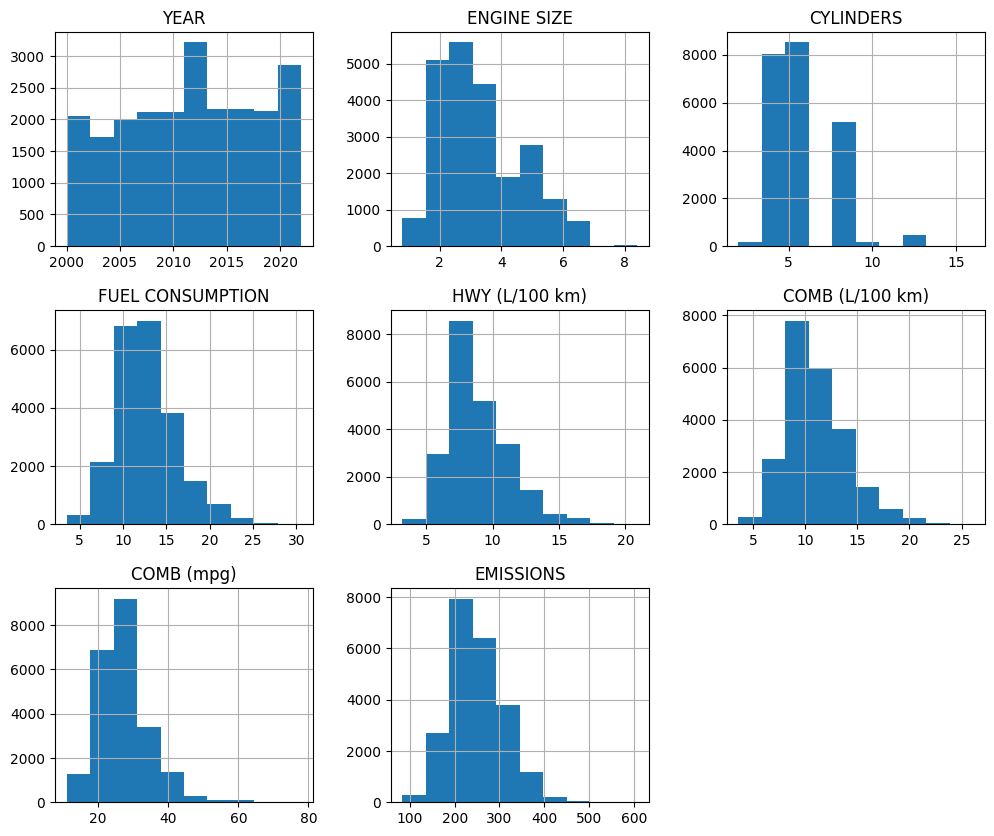

In [ ]:
import matplotlib as plt
dataFrame.hist(figsize=(12,10))

Passo 5: estudamos que a análise de correlação pe importante para definirmos as variáveis independentes da Regressão Linear. Diante disso, vamos fazer tal análise.

<ipython-input-7-9f0c4141723c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataFrame.corr(),annot=True, cmap="coolwarm")


<Axes: >

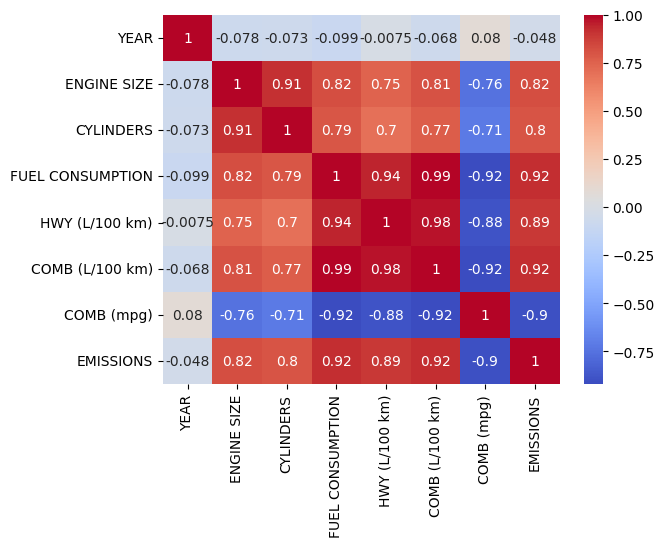

In [ ]:
import seaborn as sns
sns.heatmap(dataFrame.corr(),annot=True, cmap="coolwarm")

Passo 6: ao fazer a análise de correlação, identificamos que o campo "Fuel Consumption" é o que possui maior correlação com a emissão de CO2. Diante disso, utilizaremos esse atributo para gerar a regressão linear simples.

In [ ]:
X = dataFrame[['FUEL CONSUMPTION']]
y = dataFrame['EMISSIONS']

Passo 7: agora que separamos as variáveis independente e dependente, vamos separar os conjuntos de treinamento e de teste.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("Qtd registros separados para treinamento:", len(X_train))
print("Qtd registros separados para teste:", len(X_test))

Qtd registros separados para treinamento: 18044
Qtd registros separados para teste: 4512


Passo 8: Uma vez que os dados de teste e de treinamento estão separados, vamos aplicar a Regressão Linear simples.

In [ ]:
from sklearn.linear_model import LinearRegression
objRegressaoLinear = LinearRegression()
objRegressaoLinear.fit(X_train,y_train)

LinearRegression()

Passo 9: com a Regressão gerada, vamos pedir para que faça a previsão de poluição ao de dois veículos apenas para averiguar se deu tudo certo.

In [ ]:
data = [
          [20],
          [5]
]
objRegressaoLinear.predict(data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([362.94950832, 129.08733729])

Passo 10: como estudamos em sala de aula, é importante avaliar a acurácia do modelo a partir do cálculo do R2 e do MSE.

In [ ]:
y_pred_test = objRegressaoLinear.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("R2:",r2_score(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test,y_pred_test))

R2: 0.8424038326659904
MSE: 568.1461977988398


Passo 11: até o momento, geramos uma Regressão Linear simples, que utiliza apenas uma variável independente. Agora, vamos gerar uma Regressão Linear múltipla. Para isso, iremos selecionar mais variáveis independentes.

In [ ]:
X = dataFrame[['FUEL CONSUMPTION','ENGINE SIZE','CYLINDERS']]
X

,FUEL CONSUMPTION,ENGINE SIZE,CYLINDERS
0,9.2,1.6,4
1,8.5,1.6,4
2,12.2,3.2,6
3,13.4,3.5,6
4,10.0,1.8,4
...,...,...,...
22551,10.7,2.0,4
22552,10.5,2.0,4
22553,11.0,2.0,4
22554,11.5,2.0,4


In [ ]:
y = dataFrame['EMISSIONS']
y

0        186
1        175
2        230
3        264
4        198
        ... 
22551    219
22552    219
22553    232
22554    236
22555    252
Name: EMISSIONS, Length: 22556, dtype: int64

Passo 12: separar dados de teste dos de treinamento.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print("Qtd registros separados para treinamento:", len(X_train))
print("Qtd registros separados para teste:", len(X_test))

Qtd registros separados para treinamento: 18044
Qtd registros separados para teste: 4512


Passo 13: agora vamos aplicar a regressão linear.

In [ ]:
from sklearn.linear_model import LinearRegression
objRegressaoLinearMultipla = LinearRegression()
objRegressaoLinearMultipla.fit(X_train,y_train)

LinearRegression()

Passo 14: agora é hora de medir a acurácia do modelo a partir das métricas R2 e MSE.

In [ ]:
y_pred_test = objRegressaoLinearMultipla.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print("MSE:", mean_squared_error(y_test,y_pred_test))
print("R2:", r2_score(y_test,y_pred_test))

MSE: 506.4127985741132
R2: 0.8580120394674386
